<a href="https://colab.research.google.com/github/GesielRodrigues/Curso_PMF/blob/main/PMF_M%C3%B3dulo_03_Macroeconomia_e_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg"  width="200"/>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

# Macroeconomia e Finanças

Uma análise simplificada utilizando Python para investigar a correlação entre  determinados Ativos individuais e Índices com alguns Indicadores Macroeconômicos


Para obtenção dos dados utilizaremos a `api do Banco Centra do Brasil` e também a biblioteca `yfinance` (Yahoo Finance)


## 1 - Instalar e Importar Bibliotecas

In [1]:
# Instalar biblioteca yfinance
!pip install yfinance

In [2]:
# Importando bibliotecas padrão
from datetime import datetime

# Importando bibliotecas de terceiros
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [3]:
# Função para fazer heatmap

def heatmap(df: pd.DataFrame):
    """
    Gera um mapa de calor para visualizar a correlação entre colunas de um DataFrame.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados para análise.
    - macros2 (pd.DataFrame): DataFrame contendo as macros a serem comparadas.

    Retorna:
    None - Plota um mapa de calor utilizando seaborn.
    """
    # Calcula a matriz de correlação
    tabela_df = df.corr()

    # Lista de colunas
    lista_df = tabela_df.columns

    # Gera o mapa de calor
    sns.heatmap(tabela_df, cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.1g',
                xticklabels=lista_df,
                yticklabels=lista_df)

    # Exibe o mapa de calor
    plt.show()


Para extrair dados da API do BCB utilizamos a url conforme descrito abaixo:
```

Endereço padrão:https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}

Parâmetros:

codigo_Serie (obrigatório): parâmetro numérico que representa o código da série a ser consultada.

dataInicial (opcional): parâmetro textual que representa a data de início da consulta, no formato dd/MM/aaaa.

dataFinal (opcional): parâmetro textual que representa a data final da consulta, no formato dd/MM/aaaa.

```

Abaixo uma tabela com o código das séries que utilizaremos nesta análise:

| Indicador                                       | Código |
|-------------------------------------------------|--------|
| Taxa Selic Meta                                 | 432    |
| IPCA - Acumulado (12 Meses)                     | 13522  |
| IPCA - Administrados                            | 4449   |
| IGP-M - Índice Geral de Preços do Mercado       | 189    |
| Índice nacional de custo da construção (INCC)   | 192    |
| PIB mensal - Em Reais (milhões)                 | 4380   |
| PIB mensal - Em Dólares (milhões)               | 4385   |
| Índice de Confiança de Serviços                 | 20339  |
| Índice de Confiança do Consumidor               | 4393   |
| Taxa de câmbio - Dólar americano (compra)       | 10813  |


Para pesquisar outras séries: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries


In [4]:
# Função para facilitar a extração dos dados do BCB

def extracao_bcb(codigo: int, data_inicio: str, data_fim: str) -> pd.DataFrame:
    """
    Extrai dados da API do Banco Central do Brasil para um determinado código, no intervalo de datas fornecido.

    Parâmetros:
    - codigo (int): Código da série temporal no Banco Central do Brasil.
    - data_inicio (str): Data de início no formato 'DD-MM-YYYY'.
    - data_fim (str): Data de término no formato 'DD-MM-YYYY'.

    Retorna:
    Um DataFrame do pandas contendo os dados extraídos.
    """

    # Construir a URL formatada
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json&dataInicial={data_inicio}&dataFinal={data_fim}'

    # Leitura dos dados JSON da URL
    df = pd.read_json(url)

    # Configurar o índice para a coluna de datas e converter para o formato datetime
    df.set_index('data', inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True)

    # Renomear a coluna 'valor' para 'Value'
    df.rename(columns={'valor': 'Value'}, inplace=True)

    return df


## 2 - Indicadores Macroeconômicos

In [5]:
# Definindo período da análise
inicio = '01/01/2015'
fim = '31/12/2023'

### 2.1 - Taxa Selic

In [6]:
selic = extracao_bcb(432, inicio, fim)
selic

,Value
data,
2015-01-01,11.75
2015-01-02,11.75
2015-01-03,11.75
2015-01-04,11.75
2015-01-05,11.75
...,...
2023-12-27,11.75
2023-12-28,11.75
2023-12-29,11.75


In [7]:
# Gráfico da Selic

fig = go.Figure()
fig.add_trace(go.Scatter(name='SELIC', x=selic.index,y=selic.Value))
fig.show()

### 2.2 - Índices inflacionários

#### 2.2.1 - IPCA Acumulado

In [8]:
ipca = extracao_bcb(13522, inicio, fim)
ipca

,Value
data,
2015-01-01,7.14
2015-02-01,7.70
2015-03-01,8.13
2015-04-01,8.17
2015-05-01,8.47
...,...
2023-07-01,3.99
2023-08-01,4.61
2023-09-01,5.19


In [9]:
# Gráfico do IPCA

fig = go.Figure()
fig.add_trace(go.Scatter(name='IPCA', x=ipca.index, y=ipca.Value ))
fig.update_layout(title_text='<b>IPCA Acumulado 12M', template='simple_white')
fig.show()

#### 2.2.2 - Preços administrados

In [10]:
ipca_adm = extracao_bcb(4449, inicio, fim)

# Gráfico IPCA Administrados
fig = go.Figure()
fig.add_trace(go.Bar(name='IPCA_ADM', x=ipca_adm.index, y=ipca_adm.Value))
fig.show()

#### 2.2.3 - IGPM

In [11]:
igpm = extracao_bcb(189, inicio, fim)
igpm

,Value
data,
2015-01-01,0.76
2015-02-01,0.27
2015-03-01,0.98
2015-04-01,1.17
2015-05-01,0.41
...,...
2023-08-01,-0.14
2023-09-01,0.37
2023-10-01,0.50


In [12]:
# Gráfico IGPM
fig = go.Figure()
fig.add_trace(go.Scatter(name='IGPM', x=igpm.index, y=igpm.Value))
fig.show()

#### 2.2.4 - INCC

In [13]:
incc = extracao_bcb(192, inicio, fim)

# Gráfico INCC
fig=go.Figure()
fig.add_trace(go.Bar(name='INCC', x=incc.index, y=incc.Value))
fig.update_layout(title_text='INCC Variação Mensal', template='simple_white')
fig.show()

### 2.3 - PIB

#### 2.3.1 - Em Reais

In [14]:
pib = extracao_bcb(4380, inicio, fim)

# Gráfico PIB em milhões R$
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB', x=pib.index, y=pib.Value))
fig.show()

#### 2.3.2 - Em Dolar

In [15]:
pib_usd = extracao_bcb(4385, inicio, fim)

# Gráfico PIB em milhões US$
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB_USD', x=pib_usd.index, y=pib_usd.Value))
fig.show()

### 2.4 - Índices de Confiança

#### 2.4.1 - Sondagem de Serviços

In [16]:
confianca_servicos = extracao_bcb(20339, inicio, fim)

# Gráfico Índice Confiança Serviços
fig = go.Figure()
fig.add_trace(go.Scatter(name='ConfiancaServicos', x=confianca_servicos.index, y=confianca_servicos.Value))
fig.show()

#### 2.4.2 - Confiança do Consumidor

In [17]:
confianca_consumidor = extracao_bcb(4393, inicio, fim)

# Gráfico Índice Confiança do Consumidor
fig = go.Figure()
fig.add_trace(go.Scatter(name='Confianca_Consumidor', x=confianca_consumidor.index, y=confianca_consumidor.Value))
fig.show()

### 2.5 - Dólar

In [18]:
dolar = extracao_bcb(10813, inicio, fim)

# Gráfico Dólar
fig = go.Figure()
fig.add_trace(go.Scatter(name='DÓLAR', x=dolar.index, y=dolar.Value))
fig.update_layout(title_text='Dólar/Real', template='simple_white')
fig.show()


## 3 - Análises

### 3.1 - Criando dataframe com os indicadores macro

In [19]:
# Criando dataframe vazio
macros = pd.DataFrame()

# Pegando os dados e fazendo resample para mensal
# SELIC
macros['SELIC'] = selic.resample('M').last()['Value']

# Confiança Consumidor
macros['CONFIANCA'] = confianca_consumidor.resample('M').last()['Value']

# PIB
macros['PIB'] = pib.resample('M').last()['Value']

# IPCA
macros['IPCA'] = ipca.resample('M').last()['Value']

# INCC
macros['INCC'] = incc.resample('M').last()['Value']

# Dólar
macros['DOLAR'] = dolar.resample('M').last()['Value']

# Preenchendo valores nulos com último dado disponível "forward fill
macros.fillna(method='ffill', inplace=True)

macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2015-01-31,12.25,112.69,474363.9,7.14,0.92,2.6617
2015-02-28,12.25,112.89,466756.4,7.70,0.31,2.8777
2015-03-31,12.75,106.86,515538.3,8.13,0.62,3.2074
2015-04-30,13.25,101.56,497124.0,8.17,0.46,2.9930
2015-05-31,13.25,91.77,492285.6,8.47,0.95,3.1781
...,...,...,...,...,...,...
2023-08-31,13.25,131.02,923828.5,4.61,0.17,4.9213
2023-09-30,12.75,132.64,902394.4,5.19,0.34,5.0070
2023-10-31,12.75,132.75,943883.9,4.82,0.20,5.0569


### 3.2 - Matriz de Correlação

In [20]:
# Criando a matriz de correlação

corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
SELIC,1.000000,-0.222323,0.057862,0.516732,-0.190513,-0.331935
CONFIANCA,-0.222323,1.000000,0.556872,-0.461579,-0.236603,0.307402
PIB,0.057862,0.556872,1.000000,0.063177,0.074088,0.757670
IPCA,0.516732,-0.461579,0.063177,1.000000,0.305293,0.087097
INCC,-0.190513,-0.236603,0.074088,0.305293,1.000000,0.240611
DOLAR,-0.331935,0.307402,0.757670,0.087097,0.240611,1.000000


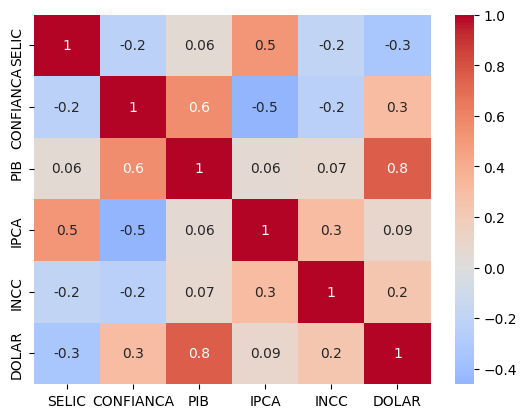

In [21]:
# Construindo heatmap com a matriz de correlação
heatmap(macros)

### 3.3 - SELIC vs IPCA

In [22]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=macros.index, y=macros['SELIC']),row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, y=macros['IPCA']),row=1, col=1, secondary_y=False)
fig.update_layout(title_text='SELIC VS IPCA', template='simple_white')
fig.show()

### 3.4 - PIB vs Dólar

In [23]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='PIB', x=macros.index, y=macros['PIB']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=macros.index, y=macros['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='PIB VS DOLAR', template='simple_white')
fig.show()

### 3.5 - Combinando ativos com macro


#### 3.5.1 - Indicadores Macro

In [24]:
# Criando dataframe vazio
macros2 = pd.DataFrame()

# Pegando os dados e fazendo resample para valores diários
# SELIC
macros2['SELIC'] = selic.resample('D').last()['Value']

# Confiança Consumidor
macros2['CONFIANCA'] = confianca_consumidor.resample('D').last()['Value']

# PIB
macros2['PIB'] = pib.resample('D').last()['Value']

# IPCA
macros2['IPCA'] = ipca.resample('D').last()['Value']

# INCC
macros2['INCC'] = incc.resample('D').last()['Value']

# Dólar
macros2['DOLAR'] = dolar.resample('D').last()['Value']

# Preenchendo valores nulos com último dado disponível "forward fill
macros2.fillna(method='ffill', inplace=True)

macros2

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2015-01-01,11.75,112.69,474363.9,7.14,0.92,NaN
2015-01-02,11.75,112.69,474363.9,7.14,0.92,2.6923
2015-01-03,11.75,112.69,474363.9,7.14,0.92,2.6923
2015-01-04,11.75,112.69,474363.9,7.14,0.92,2.6923
2015-01-05,11.75,112.69,474363.9,7.14,0.92,2.7101
...,...,...,...,...,...,...
2023-12-27,11.75,129.74,950790.7,4.68,0.07,4.8300
2023-12-28,11.75,129.74,950790.7,4.68,0.07,4.8407
2023-12-29,11.75,129.74,950790.7,4.68,0.07,4.8407


#### 3.5.2 Fundos Imobiliários

In [25]:
# Definindo datas de início e fim no formato YYY-MM-DD
start = '2015-01-01'
end = '2023-12-31'

In [26]:
#BRCR11 - Lajes corporativas
#HGLG11 - Imóveis industriais logísticos
#KNCR11 - Fundo de papel

lista_fiis = ['HGLG11.SA', 'KNCR11.SA','BRCR11.SA']

fiis = yf.download(lista_fiis, start=start, end=end)['Adj Close']
fiis

[*********************100%%**********************]  3 of 3 completed


,BRCR11.SA,HGLG11.SA,KNCR11.SA
Date,,,
2015-01-02,90.817780,90.889244,80.382553
2015-01-05,91.189308,92.472130,79.980659
2015-01-06,90.487534,91.639038,81.155479
2015-01-07,91.214073,90.805977,80.073402
2015-01-08,90.652657,90.389420,81.155479
...,...,...,...
2023-12-21,59.959999,158.913513,101.191002
2023-12-22,60.009998,159.906723,101.210808
2023-12-26,59.770000,160.671509,101.587135


#### 3.5.3 - FIIs vs Macros

In [27]:
# Juntando os dataframes através das datas

comparativo_fiis = pd.merge(fiis, macros2, how='inner', left_index=True, right_index=True)

##### Correlação

In [28]:
# Criando a tabela de correlação

tabela_fiis = comparativo_fiis.corr()
tabela_fiis

,BRCR11.SA,HGLG11.SA,KNCR11.SA,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
BRCR11.SA,1.000000,-0.544857,-0.157957,-0.233472,-0.309615,-0.852649,-0.260307,-0.085043,-0.705844
HGLG11.SA,-0.544857,1.000000,-0.164077,-0.416390,0.638877,0.800907,-0.262526,0.091646,0.804276
KNCR11.SA,-0.157957,-0.164077,1.000000,0.741721,0.218553,0.172752,0.055415,-0.431691,-0.329067
SELIC,-0.233472,-0.416390,0.741721,1.000000,-0.212560,0.050778,0.487762,-0.200245,-0.324687
CONFIANCA,-0.309615,0.638877,0.218553,-0.212560,1.000000,0.562914,-0.453333,-0.235923,0.310194
PIB,-0.852649,0.800907,0.172752,0.050778,0.562914,1.000000,0.068446,0.073939,0.769859
IPCA,-0.260307,-0.262526,0.055415,0.487762,-0.453333,0.068446,1.000000,0.308885,0.107802
INCC,-0.085043,0.091646,-0.431691,-0.200245,-0.235923,0.073939,0.308885,1.000000,0.249275
DOLAR,-0.705844,0.804276,-0.329067,-0.324687,0.310194,0.769859,0.107802,0.249275,1.000000


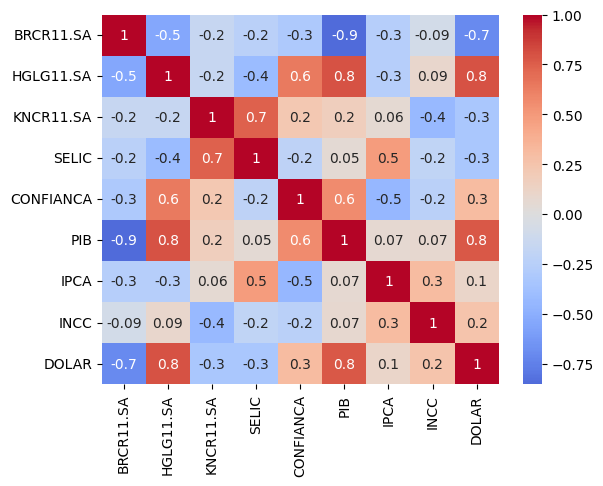

In [29]:
# Criando heatmap

lista_macros = tabela_fiis.columns

sns.heatmap(tabela_fiis, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

##### BRCR11 (Lajes corporativas) vs Dólar

In [30]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='BRCR11', x=comparativo_fiis.index, y=comparativo_fiis['BRCR11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='BRCR11 VS DOLAR', template='simple_white')
fig.show()

##### HGLG11 (Galpões Logísticos) vs Dólar

In [31]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_fiis.index, y=comparativo_fiis['HGLG11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='HGLG11.SA VS DOLAR', template='simple_white')
fig.show()

#### 3.5.4 - Ações

##### IBOV

In [32]:
ibov = pd.DataFrame()
ibov['IBOV'] = yf.download('^BVSP', start=start, end=end)['Adj Close']

ibov

[*********************100%%**********************]  1 of 1 completed


,IBOV
Date,
2015-01-02,48512.0
2015-01-05,47517.0
2015-01-06,48001.0
2015-01-07,49463.0
2015-01-08,49943.0
...,...
2023-12-21,132182.0
2023-12-22,132753.0
2023-12-26,133533.0


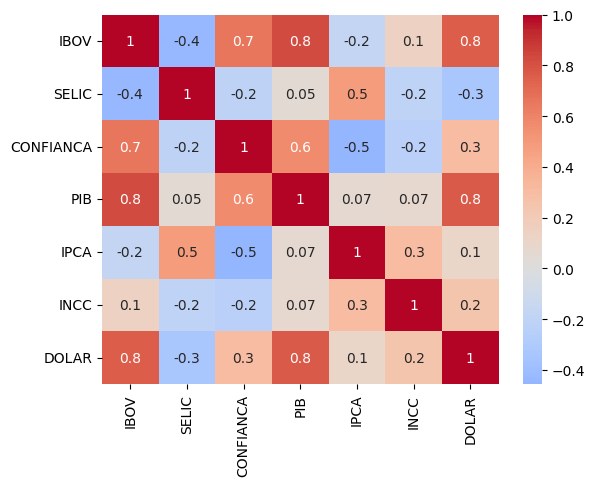

In [33]:
comparativo_ibov = pd.merge(ibov,macros2, how='inner', left_index=True, right_index=True)

heatmap(comparativo_ibov)

##### IBOV vs SELIC

In [34]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='IBOV', x=comparativo_ibov.index, y=comparativo_ibov['IBOV']),row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=comparativo_ibov.index, y=comparativo_ibov['SELIC']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='IBOV VS SELIC', template='simple_white')
fig.show()

##### Varejo Eletrônico (MGLU3, BHIA, AMER)

In [35]:
lista_varejo = ['MGLU3.SA','BHIA3.SA','AMER3.SA']

varejo_eletronico = yf.download(lista_varejo, start, end)['Adj Close']

varejo_eletronico

[*********************100%%**********************]  3 of 3 completed


,AMER3.SA,BHIA3.SA,MGLU3.SA
Date,,,
2015-01-02,20.724070,148.479416,0.215259
2015-01-05,20.061657,148.479416,0.219304
2015-01-06,20.118435,148.479416,0.216414
2015-01-07,19.919712,160.707123,0.223638
2015-01-08,19.266762,160.707123,0.221905
...,...,...,...
2023-12-21,0.930000,10.380000,2.090000
2023-12-22,0.920000,10.920000,2.120000
2023-12-26,0.910000,10.940000,2.110000


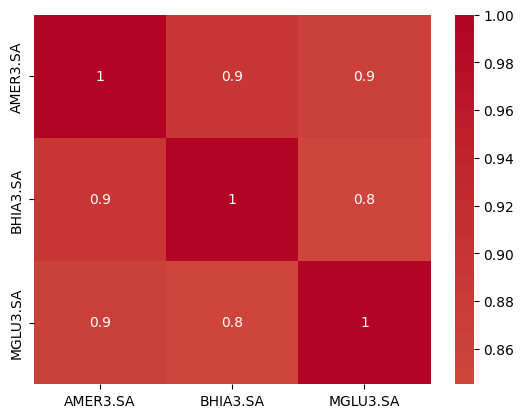

In [36]:
heatmap(varejo_eletronico)

##### Moda/Vestuário (GUAR, LREN, AMAR, ARZZ)

In [37]:
moda_vestuario = ['GUAR3.SA','LREN3.SA','AMAR3.SA','ARZZ3.SA']
moda_vestuario = yf.download(moda_vestuario, start, end)['Adj Close']

moda_vestuario

[*********************100%%**********************]  4 of 4 completed


,AMAR3.SA,ARZZ3.SA,GUAR3.SA,LREN3.SA
Date,,,,
2015-01-02,60.281265,20.398834,8.123258,10.444163
2015-01-05,59.824276,19.759644,7.866183,10.153820
2015-01-06,56.126804,19.372972,7.840377,10.270782
2015-01-07,57.165421,19.570248,7.984301,10.445543
2015-01-08,56.542252,19.475555,7.867176,10.457927
...,...,...,...,...
2023-12-21,3.470000,66.160004,6.570000,17.139999
2023-12-22,3.400000,66.650002,6.640000,17.709999
2023-12-26,3.360000,66.400002,6.860000,17.580000


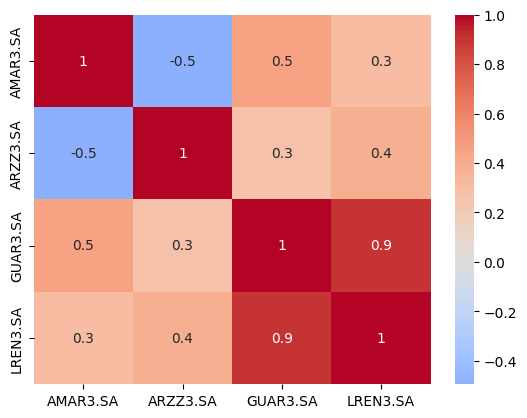

In [38]:
heatmap(moda_vestuario)

##### Supermercado Atacarejo (ASAI, CRFB, GMAT, PCAR)

In [39]:
supermercados = ['ASAI3.SA', 'CRFB3.SA', 'GMAT3.SA', 'PCAR3.SA']

varejo_supermercados = yf.download(supermercados, start, end)['Adj Close']

varejo_supermercados

[*********************100%%**********************]  4 of 4 completed


,ASAI3.SA,CRFB3.SA,GMAT3.SA,PCAR3.SA
Date,,,,
2015-01-02,NaN,NaN,NaN,66.267319
2015-01-05,NaN,NaN,NaN,66.267319
2015-01-06,NaN,NaN,NaN,66.267319
2015-01-07,NaN,NaN,NaN,66.267319
2015-01-08,NaN,NaN,NaN,66.267319
...,...,...,...,...
2023-12-21,13.24,12.49,7.02,3.910000
2023-12-22,13.41,12.31,6.88,4.020000
2023-12-26,13.37,12.27,7.17,4.080000


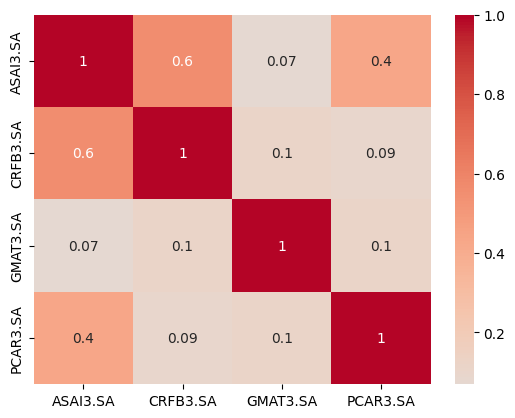

In [40]:
heatmap(varejo_supermercados)

##### Construtoras (CYRE, MRVE, HBOR3, EVEN)

In [41]:
lista_construcao = ['CYRE3.SA','MRVE3.SA','HBOR3.SA', 'EVEN3.SA']

construcao = yf.download(lista_construcao, start, end)['Adj Close']

construcao

[*********************100%%**********************]  4 of 4 completed


,CYRE3.SA,EVEN3.SA,HBOR3.SA,MRVE3.SA
Date,,,,
2015-01-02,7.036764,4.062300,16.507706,4.484663
2015-01-05,7.218575,3.815633,16.074244,4.404025
2015-01-06,7.420586,3.846466,16.399342,4.521880
2015-01-07,7.615865,4.070008,17.266266,4.621126
2015-01-08,7.676467,4.039175,16.977289,4.676953
...,...,...,...,...
2023-12-21,23.780001,7.600000,3.230000,10.690000
2023-12-22,24.219999,7.700000,3.350000,10.720000
2023-12-26,24.160000,7.810000,3.420000,10.750000


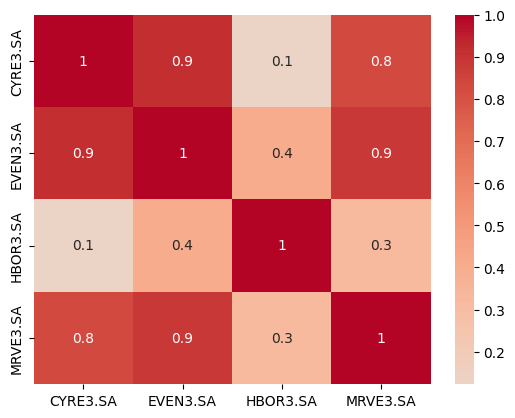

In [42]:
heatmap(construcao)

##### Commodities (PETR, PRIO, VALE, SUZB)

In [43]:
lista_commodities = ['PETR4.SA', 'PRIO3.SA','VALE3.SA','SUZB3.SA']

commodities = yf.download(lista_commodities, start, end)['Adj Close']

commodities

[*********************100%%**********************]  4 of 4 completed


,PETR4.SA,PRIO3.SA,SUZB3.SA,VALE3.SA
Date,,,,
2015-01-02,3.196011,0.439294,17.527534,12.600160
2015-01-05,2.922849,0.406347,17.527534,12.410685
2015-01-06,2.827241,0.366411,17.527534,12.908059
2015-01-07,2.960408,0.365413,17.527534,13.381751
2015-01-08,3.151622,0.377394,17.527534,13.523854
...,...,...,...,...
2023-12-21,36.389999,45.160000,54.450001,76.970001
2023-12-22,36.740002,45.369999,54.939999,76.389999
2023-12-26,37.330002,45.919998,55.220001,76.660004


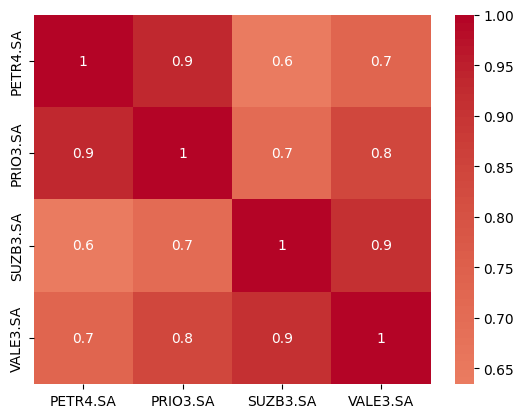

In [44]:
heatmap(commodities)

##### Bancos (BBAS, BBDC, ITUB, SANB)

In [45]:
lista_bancos = ['BBAS3.SA','BBDC4.SA', 'ITUB4.SA', 'SANB11.SA']

bancos = yf.download(lista_bancos, start, end)['Adj Close']

bancos

[*********************100%%**********************]  4 of 4 completed


,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA
Date,,,,
2015-01-02,13.299431,8.752048,12.454830,7.371656
2015-01-05,13.023458,8.770103,12.517408,7.319501
2015-01-06,13.205485,9.058607,12.719902,7.371656
2015-01-07,13.786782,9.418596,13.180096,7.678809
2015-01-08,13.833757,9.467111,13.386261,7.551314
...,...,...,...,...
2023-12-21,54.290001,16.758947,32.772964,31.379999
2023-12-22,54.439999,16.810934,33.292694,31.540001
2023-12-26,54.939999,16.860876,33.632519,31.700001


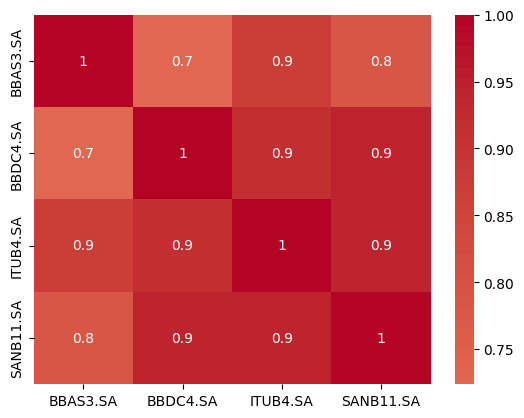

In [46]:
heatmap(bancos)

## 4 - Conclusões

Essas análises oferece alguns insights superficiais, permitindo a identificação de correlações que são intuitivas, como por exemplo a relação entre o aumento da Taxa Selic e a queda no desempenho da bolsa.

Para uma melhor compreensão, é interessante aprofundar um pouco mais, realizando análises em diferentes janelas de tempo ou incluindo uma variedade maior de ativos.

__________
**Disclaimer:** É crucial salientar que essas observações não devem ser interpretadas como recomendações de investimento. O mercado financeiro é complexo, influenciado por uma variedade de fatores.

O presente trabalho foi realizado apenas para fins de estudos e não substitui a consulta a profissionais qualificados ou a realização de uma análise mais aprofundada antes de tomar decisões financeiras.
